# GRIP: The Sparks Foundation
## Data Science and Business Analytics Intern
### Author: Ajinkya Sonawane
### Task 3: Exploratory Data Analysis - Retail (Level: Beginner)
#### Dataset: 'SampleSuperstore'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_retail=pd.read_csv('SampleSuperstore.csv')

In [4]:
df_retail.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df_retail.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [6]:
print('df_retail size:' ,df_retail.size)
print('df_retail shape:' ,df_retail.shape)

df_retail size: 129922
df_retail shape: (9994, 13)


In [7]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df_retail.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [24]:
for colname,colval in df_retail.iteritems():
    print(colname,':',df_retail[colname].nunique())

Ship Mode : 4
Segment : 3
Country : 1
City : 531
State : 49
Postal Code : 631
Region : 4
Category : 3
Sub-Category : 17
Sales : 5825
Quantity : 14
Discount : 12
Profit : 7287


In [25]:
for colname,colval in df_retail.iteritems():
    if df_retail[colname].dtype==object:
        print(colname,':',df_retail[colname].unique())

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
City : ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'


### Univariate Analysis - Categorial Data

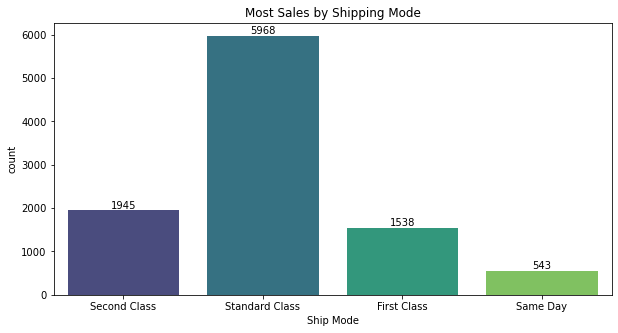

In [189]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df_retail['Ship Mode'],palette='viridis')
plt.title('Most Sales by Shipping Mode')
ax.bar_label(ax.containers[0], label_type='edge');

**Observation:** Most Sales happen by standard class as its shipping mode.

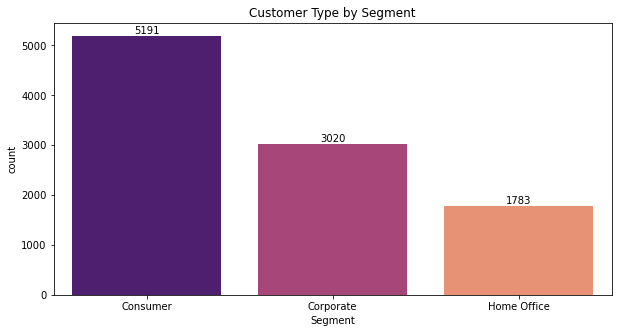

In [187]:
plt.figure(figsize=(10,5))
ax=sns.countplot(df_retail['Segment'],palette='magma')
plt.title('Customer Type by Segment')
ax.bar_label(ax.containers[0], label_type='edge');

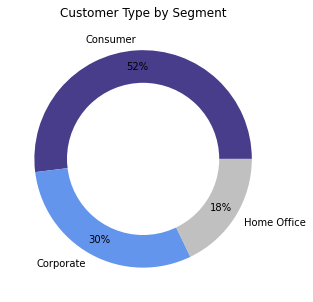

In [160]:
fig, ax = plt.subplots()
colors = ['darkslateblue', 'cornflowerblue', 'silver']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
ax.pie(df_retail['Segment'].value_counts(),labels=df_retail['Segment'].value_counts().index[0:],colors=colors,autopct='%.0f%%',pctdistance=0.85)
ax.set_title('Customer Type by Segment')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

**Observation:** The main segment of customers were Consumer with around 52.0%, only 30% were from Corporate segment and 18% were from Home Office segment.
Although Consumer was the main segment in overall picture, it's also worth to check on the Sales and Quantity performance of these segments for Superstore owners to have an clear idea which segment should they target more to earn more sales.

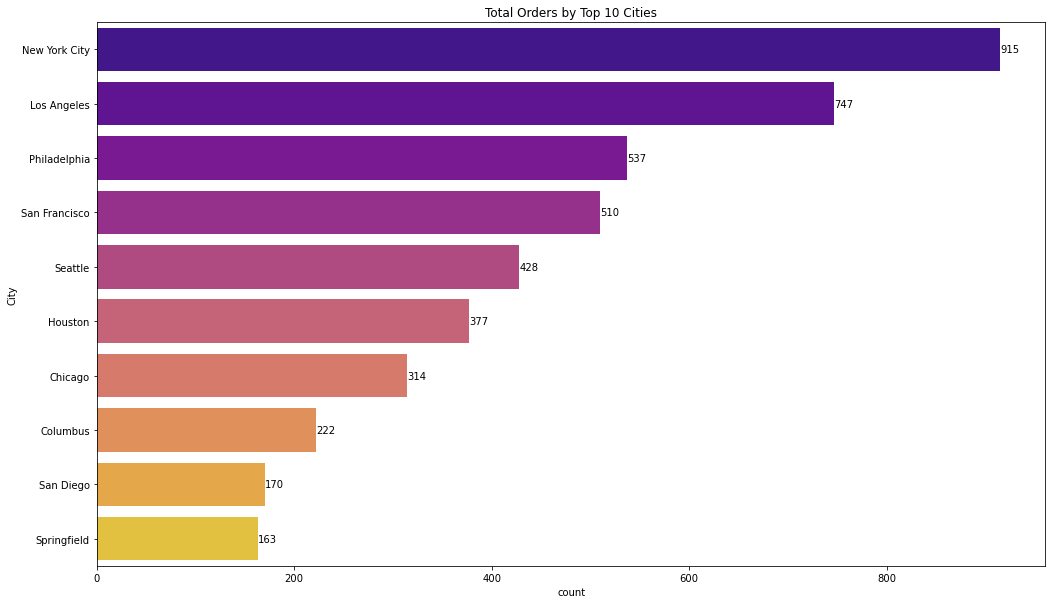

In [186]:
plt.figure(figsize=(17,10))
ax=sns.countplot(y=df_retail['City'],order=df_retail['City'].value_counts().index[0:10],palette='plasma')
plt.title('Total Orders by Top 10 Cities')
ax.bar_label(ax.containers[0], label_type='edge');

**Observation:** New york city as maximum number of buyers followed by Los Angeles and Philadelphia.

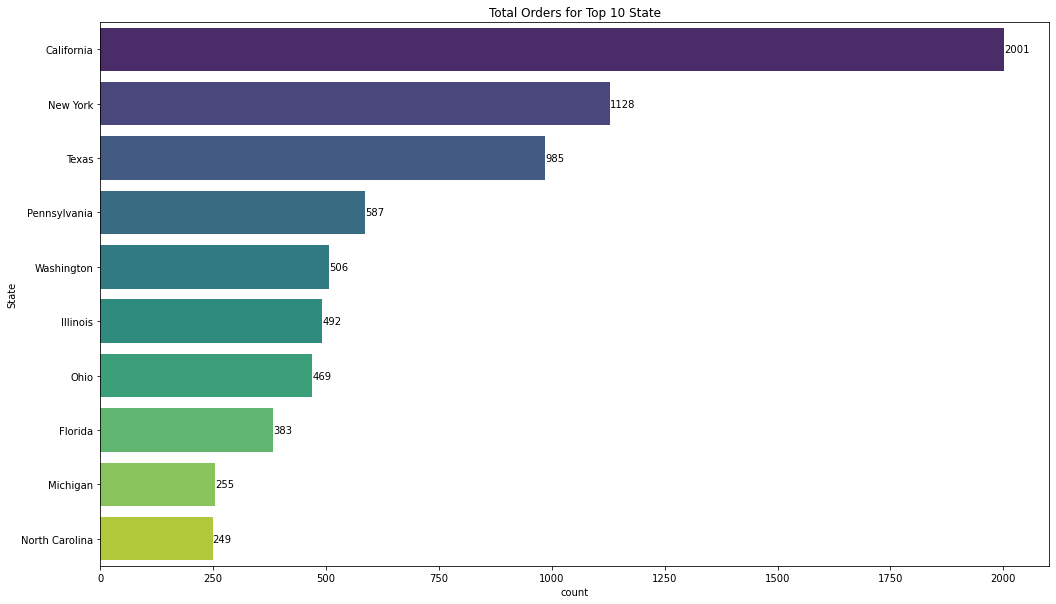

In [190]:
plt.figure(figsize=(17,10))
ax=sns.countplot(y=df_retail['State'],order=df_retail['State'].value_counts().index[0:10],palette='viridis')
plt.title('Total Orders for Top 10 State')
ax.bar_label(ax.containers[0], label_type='edge');

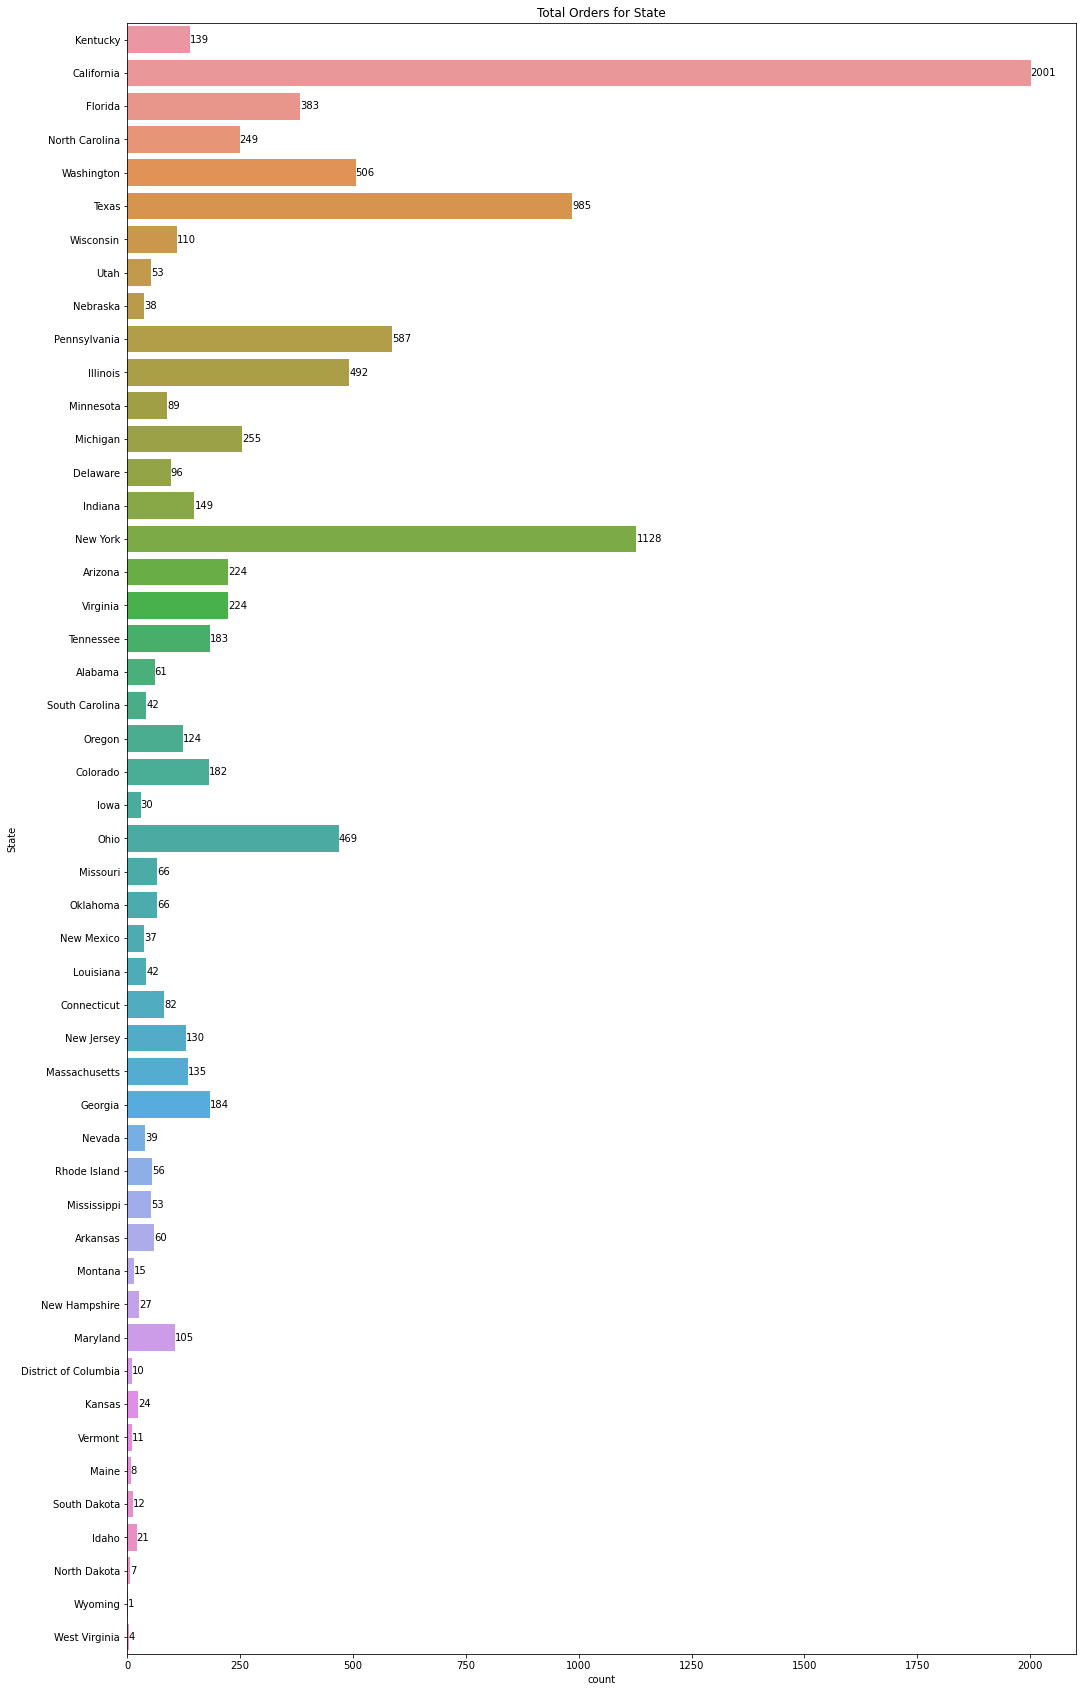

In [142]:
plt.figure(figsize=(17,30))
ax=sns.countplot(y=df_retail['State'])
plt.title('Total Orders for State')
ax.bar_label(ax.containers[0], label_type='edge');

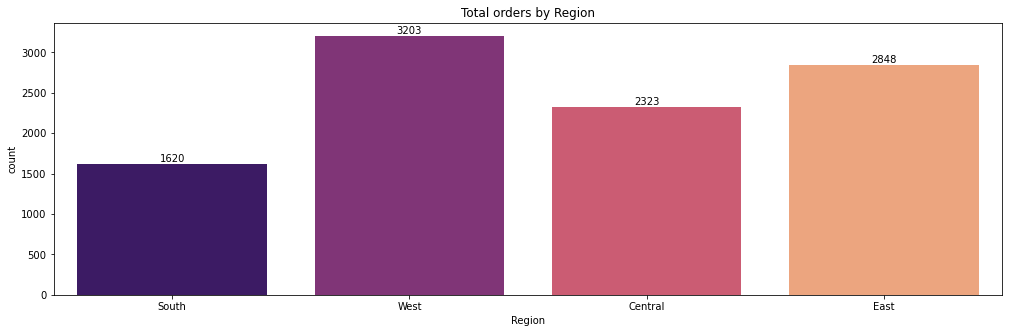

In [191]:
plt.figure(figsize=(17,5))
ax=sns.countplot(df_retail['Region'],palette='magma')
plt.title('Total orders by Region')
ax.bar_label(ax.containers[0],label_type='edge');

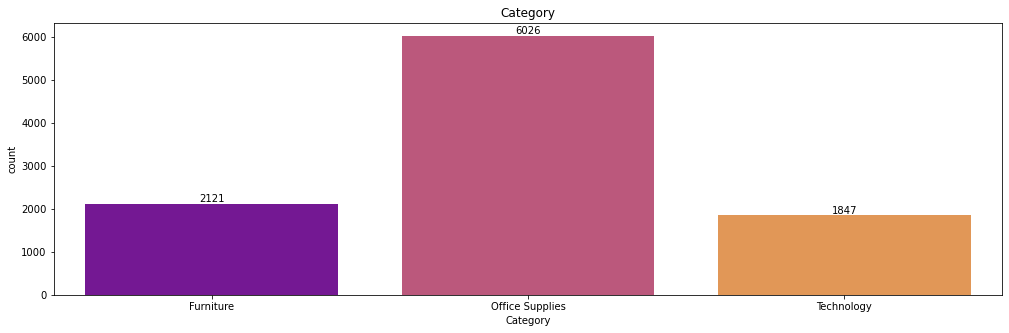

In [192]:
plt.figure(figsize=(17,5))
ax=sns.countplot(df_retail['Category'],palette='plasma')
plt.title('Category')
ax.bar_label(ax.containers[0],label_type='edge');

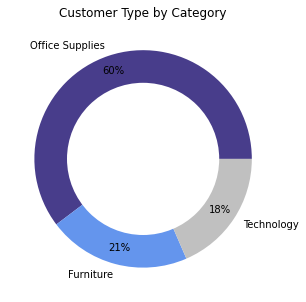

In [185]:
fig, ax = plt.subplots()
colors = ['darkslateblue', 'cornflowerblue', 'silver']
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
ax.pie(df_retail['Category'].value_counts(),labels=df_retail['Category'].value_counts().index[0:],colors=colors,autopct='%.0f%%',pctdistance=0.85)
ax.set_title('Customer Type by Category')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle);

**Observation:** The main category of product ordered were Office Supplies with around 60%, only 21% were Furniture and 18% were Technology.

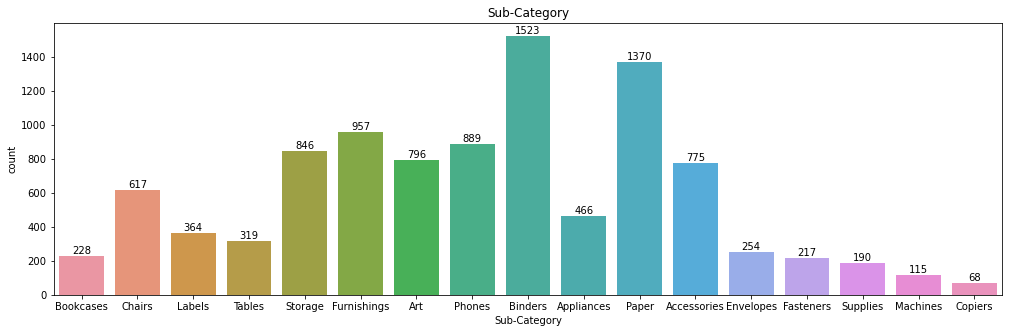

In [20]:
plt.figure(figsize=(17,5))
ax=sns.countplot(df_retail['Sub-Category'])
plt.title('Sub-Category')
ax.bar_label(ax.containers[0],label_type='edge');

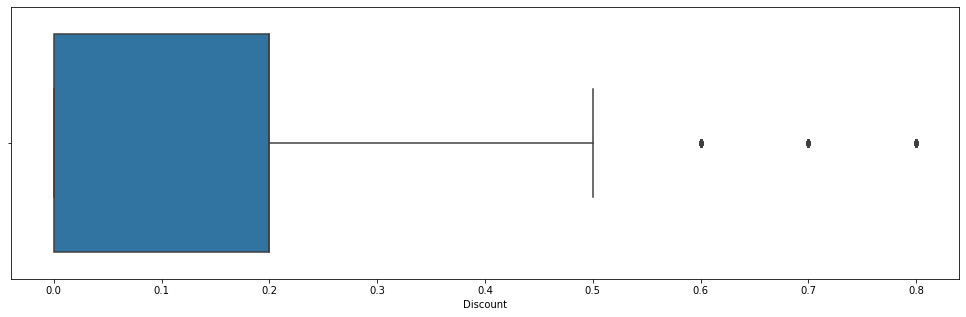

In [123]:
sns.boxplot(df_retail['Discount']);

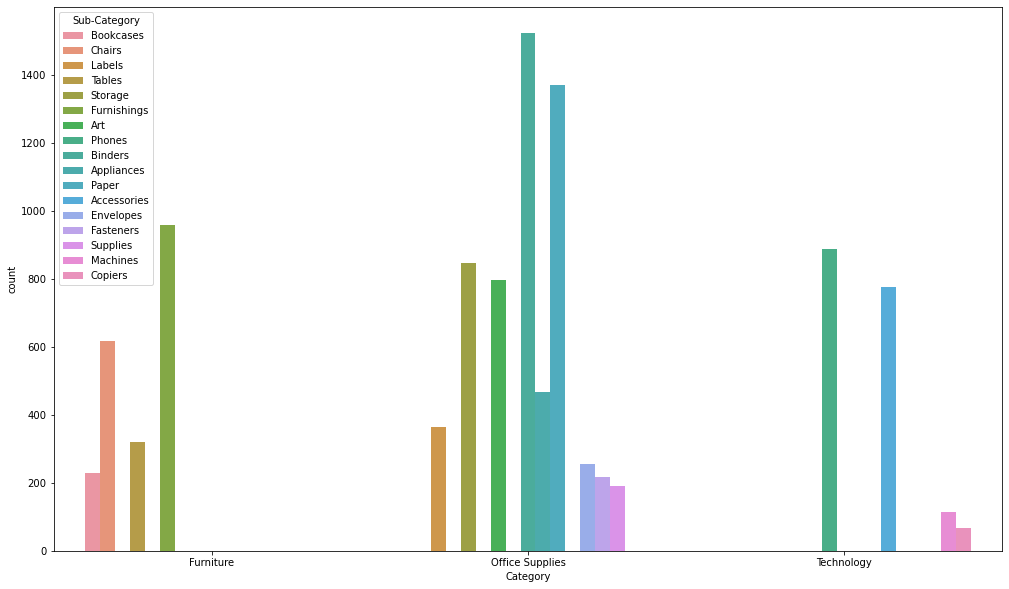

In [21]:
plt.figure(figsize=(17,10))
sns.countplot(df_retail['Category'],hue=df_retail['Sub-Category']);

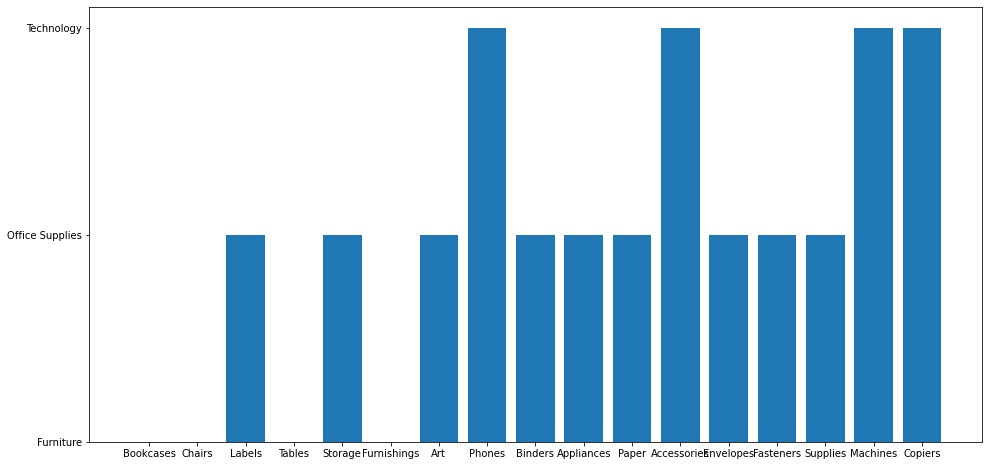

In [120]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df_retail);

### Bivariate Analysis 

#### Correlation

In [22]:
df_retail.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


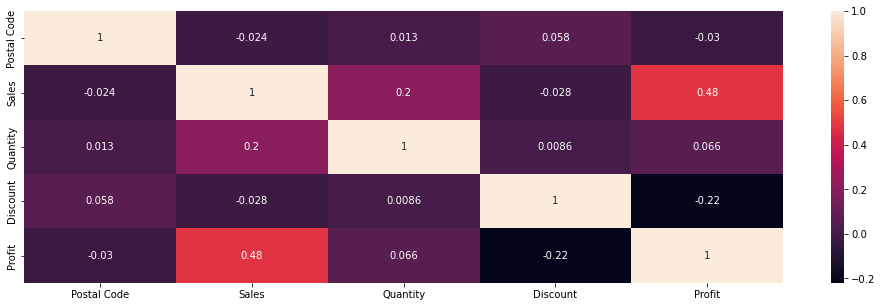

In [194]:
sns.heatmap(df_retail.corr(),annot=True)
plt.rcParams['figure.figsize']=(17,5)

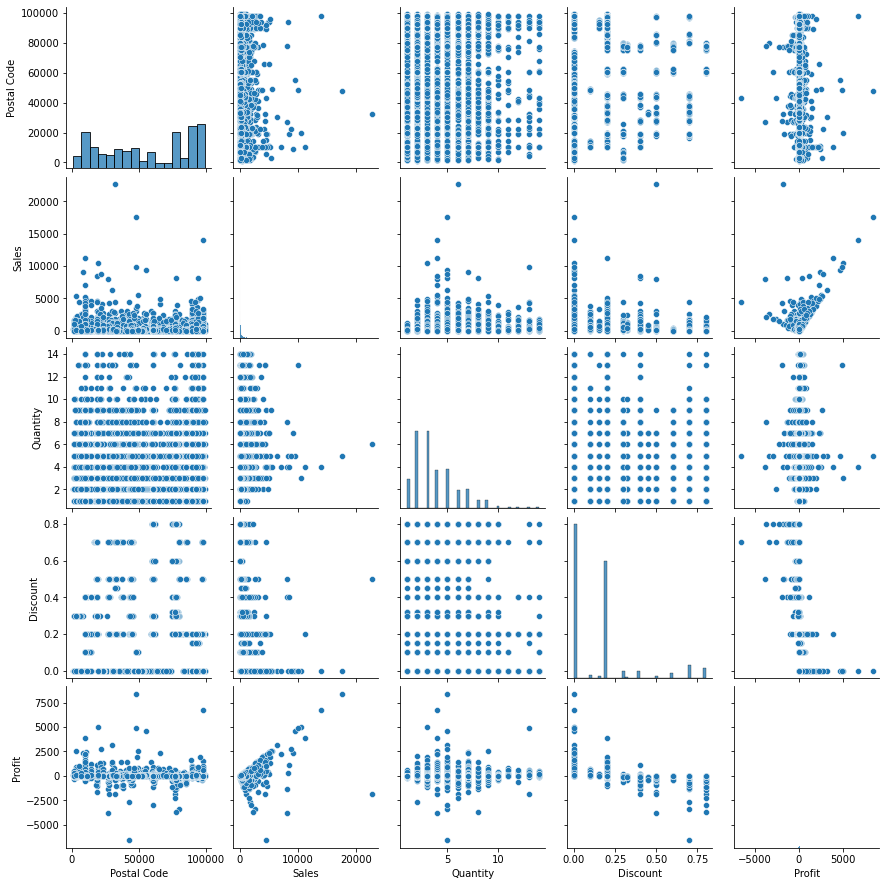

In [114]:
sns.pairplot(df_retail);

#### Categories of products having same day ship mode

In [60]:
df_retail[df_retail['Ship Mode']=='Same Day']['Category'].value_counts()

Office Supplies    326
Furniture          119
Technology          98
Name: Category, dtype: int64

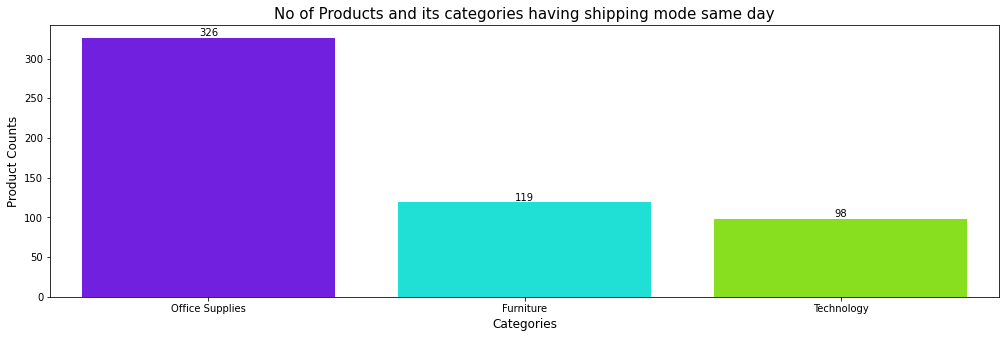

In [79]:
plt.figure(figsize=(17,5))
ax=sns.barplot(x=df_retail[df_retail['Ship Mode']=='Same Day']['Category'].value_counts().index[0:3],y=df_retail[df_retail['Ship Mode']=='Same Day']['Category'].value_counts()[0:3],palette="hsv_r")
plt.xlabel('Categories',fontsize=12)
plt.ylabel('Product Counts',fontsize=12)
plt.title('No of Products and its categories having shipping mode same day',fontsize=15)
ax.bar_label(ax.containers[0],label_type='edge');

#### Sub-categories of products having same day ship mode

In [70]:
df_retail[df_retail['Ship Mode']=='Same Day']['Sub-Category'].value_counts()

Paper          81
Binders        74
Storage        52
Furnishings    52
Phones         42
Accessories    41
Chairs         39
Art            36
Appliances     23
Tables         21
Labels         21
Fasteners      14
Envelopes      14
Supplies       11
Machines       10
Bookcases       7
Copiers         5
Name: Sub-Category, dtype: int64

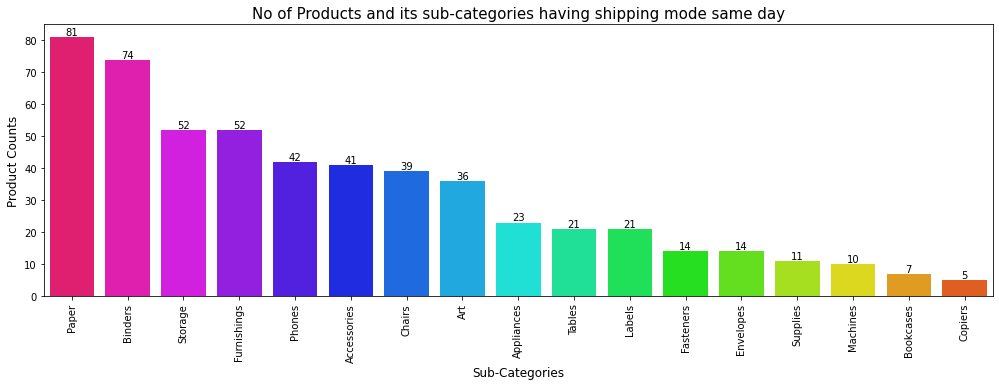

In [78]:
plt.figure(figsize=(17,5))
ax=sns.barplot(x=df_retail[df_retail['Ship Mode']=='Same Day']['Sub-Category'].value_counts().index[0:17],y=df_retail[df_retail['Ship Mode']=='Same Day']['Sub-Category'].value_counts()[0:17],palette="hsv_r")
plt.xlabel('Sub-Categories',fontsize=12)
plt.ylabel('Product Counts',fontsize=12)
plt.xticks(rotation=90)
plt.title('No of Products and its sub-categories having shipping mode same day',fontsize=15)
ax.bar_label(ax.containers[0],label_type='edge');

#### No of products having same day ship mode statewise

In [75]:
df_retail[df_retail['Ship Mode']=='Same Day']['State'].value_counts()

California        119
New York           62
Ohio               52
Texas              48
Washington         39
Florida            28
Illinois           26
Michigan           18
Pennsylvania       16
Arizona            16
Georgia            15
North Carolina     14
Connecticut        10
Oklahoma            7
Wisconsin           7
Maryland            7
Colorado            6
Virginia            5
South Carolina      5
Kentucky            5
Massachusetts       4
Minnesota           4
Mississippi         4
Nebraska            3
Indiana             3
Tennessee           2
Delaware            2
Utah                2
Arkansas            2
Louisiana           2
Missouri            2
Nevada              1
New Mexico          1
Kansas              1
Alabama             1
New Jersey          1
Montana             1
Iowa                1
West Virginia       1
Name: State, dtype: int64

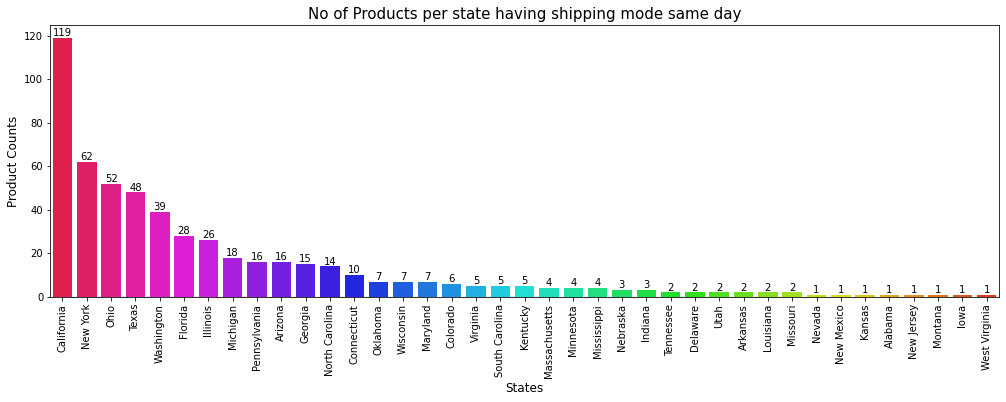

In [77]:
plt.figure(figsize=(17,5))
ax=sns.barplot(x=df_retail[df_retail['Ship Mode']=='Same Day']['State'].value_counts().index[0:],y=df_retail[df_retail['Ship Mode']=='Same Day']['State'].value_counts()[0:],palette="hsv_r")
plt.xlabel('States',fontsize=12)
plt.ylabel('Product Counts',fontsize=12)
plt.xticks(rotation=90)
plt.title('No of Products per state having shipping mode same day',fontsize=15)
ax.bar_label(ax.containers[0],label_type='edge');

#### No of products having same day ship mode segmentwise

In [80]:
df_retail[df_retail['Ship Mode']=='Same Day']['Segment'].value_counts()

Consumer       317
Corporate      114
Home Office    112
Name: Segment, dtype: int64

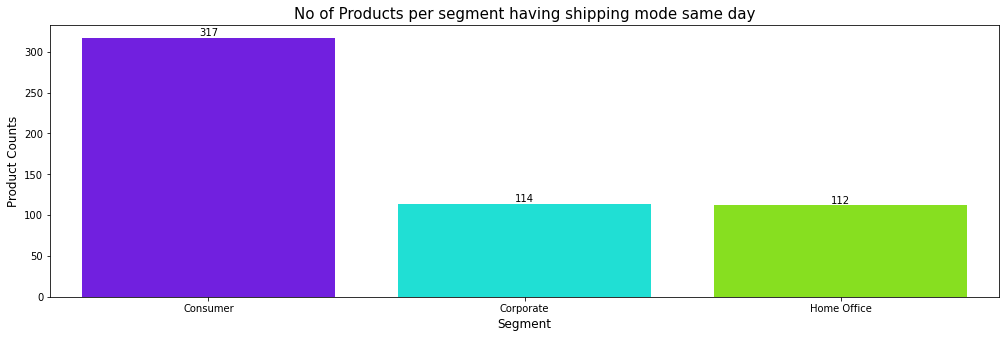

In [81]:
plt.figure(figsize=(17,5))
ax=sns.barplot(x=df_retail[df_retail['Ship Mode']=='Same Day']['Segment'].value_counts().index[0:],y=df_retail[df_retail['Ship Mode']=='Same Day']['Segment'].value_counts()[0:],palette="hsv_r")
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Product Counts',fontsize=12)
plt.title('No of Products per segment having shipping mode same day',fontsize=15)
ax.bar_label(ax.containers[0],label_type='edge');

#### Profits for products having same day ship mode

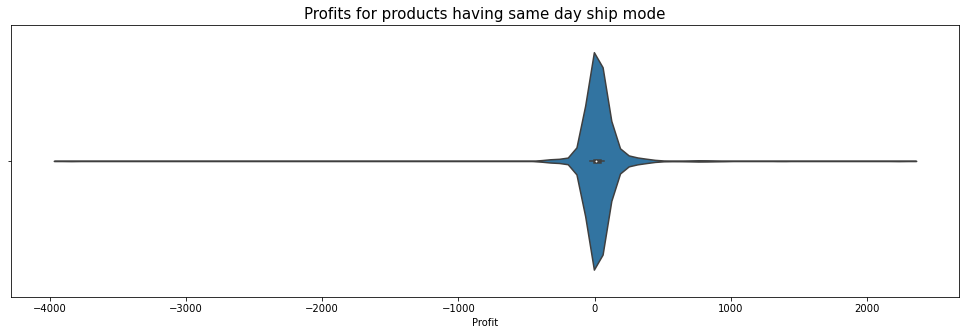

In [88]:
sns.violinplot(df_retail[df_retail['Ship Mode']=='Same Day']['Profit'])
plt.title('Profits for products having same day ship mode',fontsize=15);

**Observation** Same day delivery is the new future and improvements in this segment can be useful.

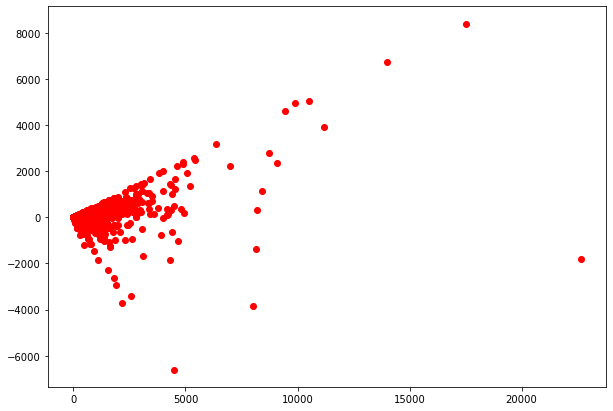

In [195]:
plt.figure(figsize=(10,7))
plt.scatter(df_retail["Sales"] , df_retail["Profit"],color='r');

#### Categories of products having other than same day ship mode

In [89]:
df_retail[df_retail['Ship Mode']!='Same Day']['Category'].value_counts()

Office Supplies    5700
Furniture          2002
Technology         1749
Name: Category, dtype: int64

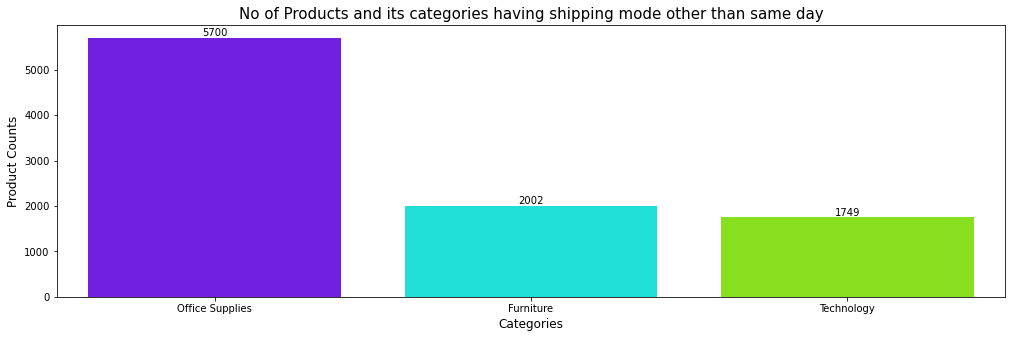

In [92]:
plt.figure(figsize=(17,5))
ax=sns.barplot(x=df_retail[df_retail['Ship Mode']!='Same Day']['Category'].value_counts().index[0:3],y=df_retail[df_retail['Ship Mode']!='Same Day']['Category'].value_counts()[0:3],palette="hsv_r")
plt.xlabel('Categories',fontsize=12)
plt.ylabel('Product Counts',fontsize=12)
plt.title('No of Products and its categories having shipping mode other than same day',fontsize=15)
ax.bar_label(ax.containers[0],label_type='edge');

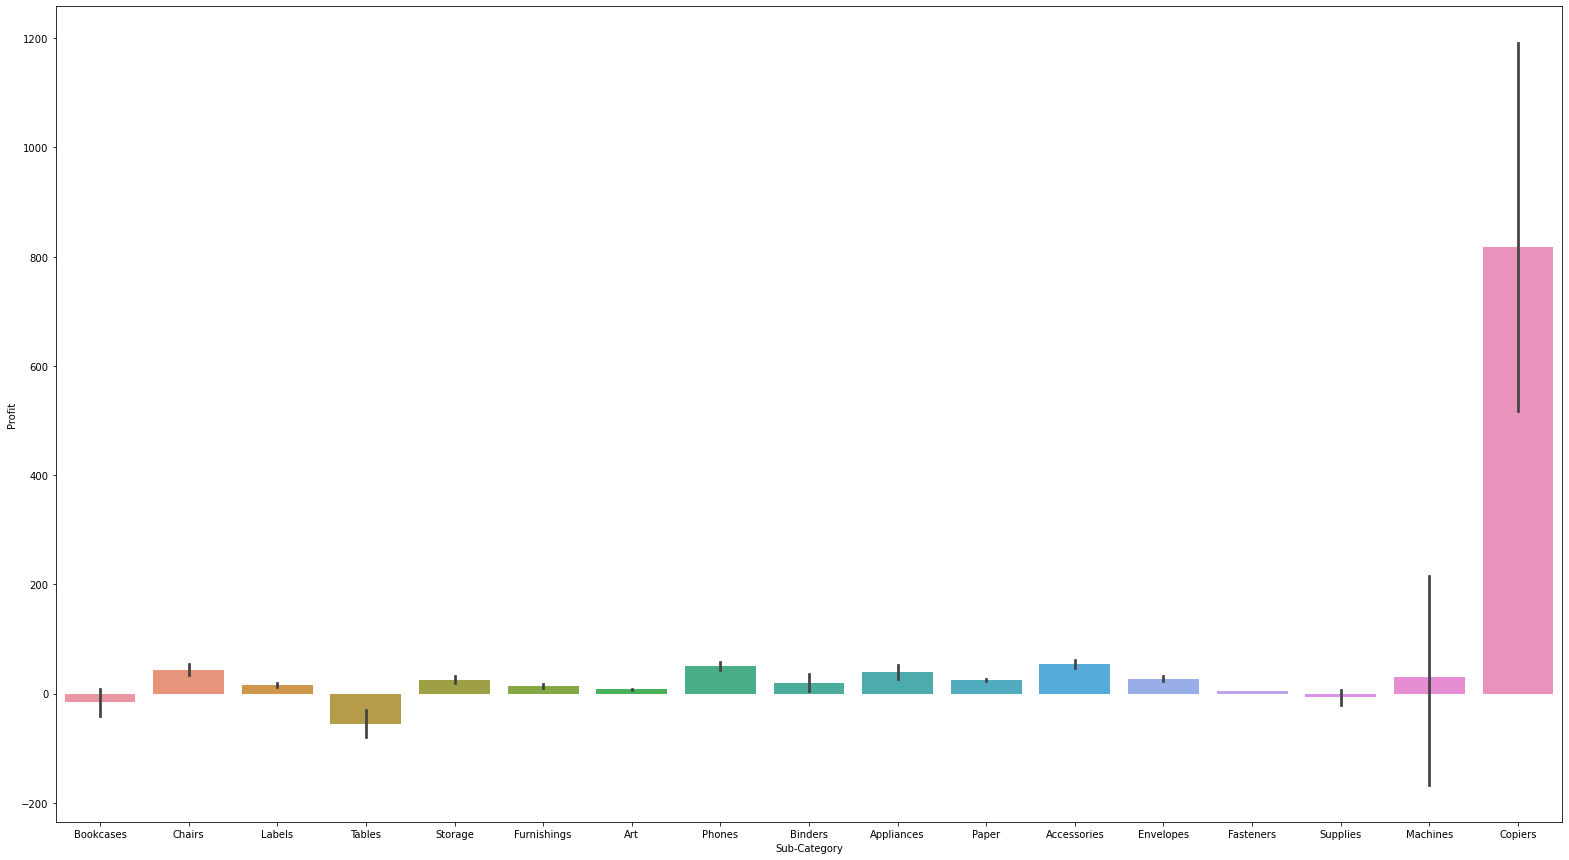

In [121]:
plt.figure(figsize=(27,15))
sns.barplot(x=df_retail['Sub-Category'], y=df_retail['Profit']);

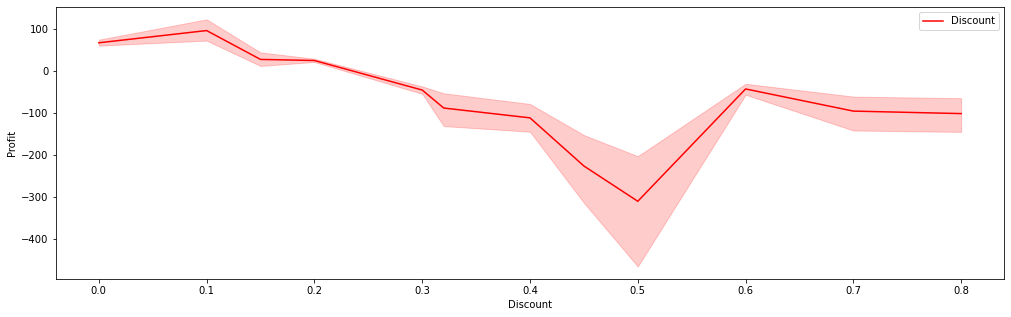

In [122]:
plt.figure(figsize = (17,5))
sns.lineplot('Discount', 'Profit', data = df_retail, color = 'r', label= 'Discount')
plt.legend();

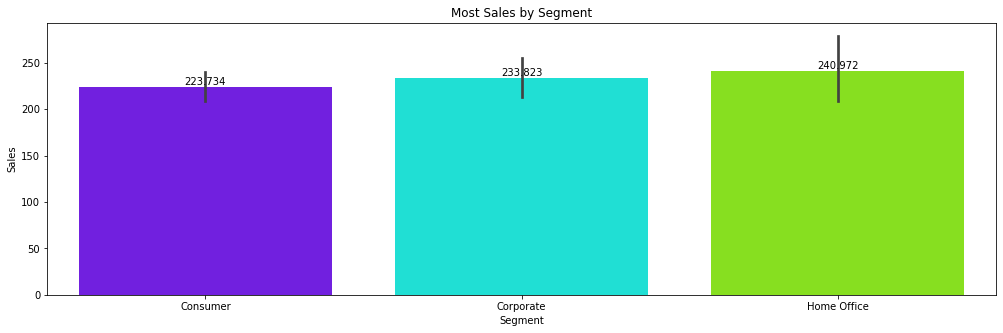

In [175]:
ax=sns.barplot(x='Segment', y='Sales', data=df_retail, palette='hsv_r')
plt.title('Most Sales by Segment')
ax.bar_label(ax.containers[0],label_type='edge');

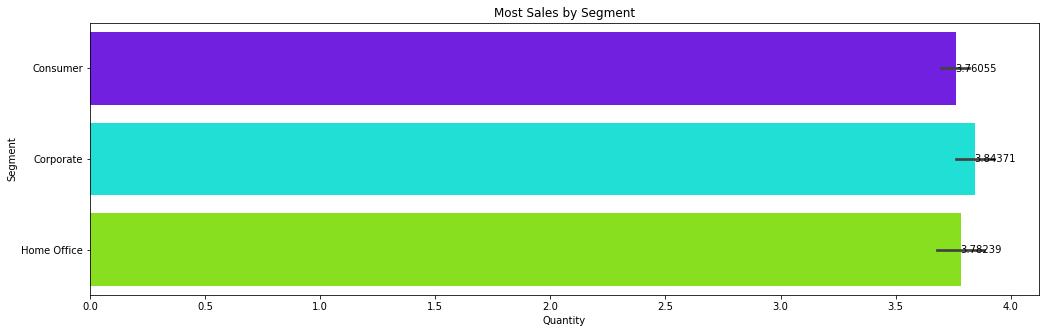

In [178]:
ax=sns.barplot(x='Quantity', y='Segment', data=df_retail, palette='hsv_r')
plt.title('Most Sales by Segment')
ax.bar_label(ax.containers[0],label_type='edge');

**Observation:**
Consumer segment represented the Most Sales and they ordered the Most Quantity of item across all segments. Therefore, Superstore's owners should further target Consumer segment's customers when setting sales and marketing strategy.

### Spread for numerical data

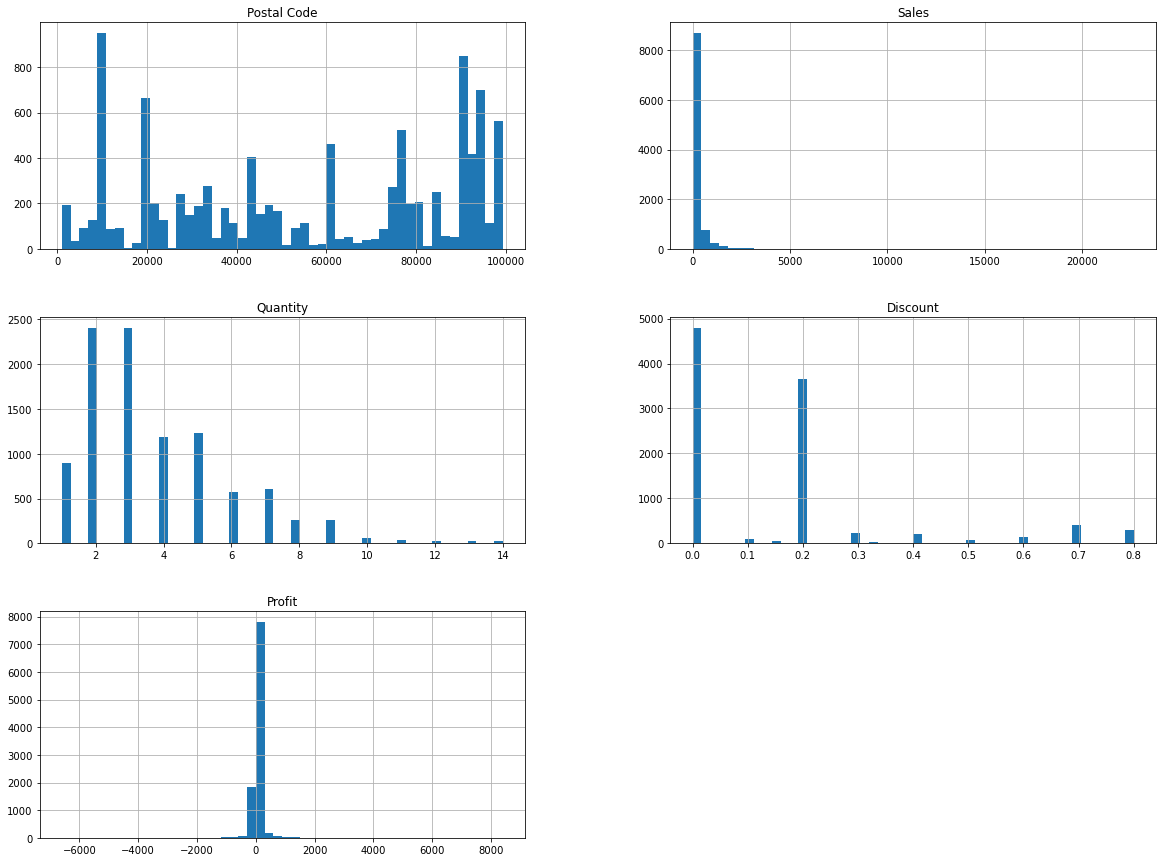

In [113]:
df_retail.hist(bins=50 ,figsize=(20,15));

# Summary

To conclude, if you are the Superstores owner who is planning to grow the store sales and get a better understanding on the customer behaviour to set up your own sales and marketing strategy, I suggest you should target **Consumer segment** customer as they represented the most sales & quantity of items ordered across all segments. From a geographical point of view, you should target more on US West Region, for Cities, put more ads in **New York City, Los Angeles, and Philadelphia** while for States, put more marketing promotion in **California, New York, and Texas.**